# Machine Learning Tips that will save you hours of head scratching

## Setup

In [1]:
%matplotlib inline
import os
import platform
import random
from platform import python_version

import jupyterlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)
print("seaborn==%s" % sns.__version__)

System
os name: posix
system: Darwin
release: 18.7.0

Python
version: 3.7.3

Python Packages
jupterlab==1.1.5
pandas==1.0.0
numpy==1.17.4
seaborn==0.9.0


In [2]:
np.random.seed(42)

In [3]:
n = 1000
df = pd.DataFrame(
    {
        "customer_id": ["customer_%d" % i for i in range(n)],
        "product_a_ratio": np.random.random_sample(n),
        "std_price_product_a": np.random.normal(0, 1, n),
        "n_purchases_product_a": np.random.randint(0, 10, n),
    }
)
df.loc[100, "std_price_product_a"] = pd.NA
df["product_b_ratio"] = df["product_a_ratio"]
df["y"] = np.random.randint(0, 2, n)
df.set_index("customer_id", inplace=True)
df.shape

(1000, 5)

In [4]:
df.head()

,product_a_ratio,std_price_product_a,n_purchases_product_a,product_b_ratio,y
customer_id,,,,,
customer_0,0.374540,0.177701,0,0.374540,0
customer_1,0.950714,-1.33534,8,0.950714,1
customer_2,0.731994,0.380198,0,0.731994,0
customer_3,0.598658,0.610586,2,0.598658,1
customer_4,0.156019,0.55979,7,0.156019,1


In [5]:
assert (
    len(set(df[df.y == 0].index).intersection(df[df.y == 1])) == 0
), "Positive customers have intersection with negative customers"

In [6]:
assert len(df[df.index.duplicated()]) == 0, "There are duplicates in trainset"

In [7]:
for col in df.columns:
    assert df[df[col].isnull()].shape[0] == 0, "%s col has %d missing values" % (
        col,
        df[df[col].isnull()].shape[0],
    )

AssertionError: std_price_product_a col has 1 missing values

In [8]:
df = df[df['std_price_product_a'].notnull()].copy()
df.shape

(999, 5)

In [9]:
for col in df.columns:
    assert df[df[col].isnull()].shape[0] == 0, "%s col has %d missing values" % (col, df[df[col].isnull()].shape[0])

In [10]:
features_on_0_1_scale = [
    'product_a_ratio',
    'product_b_ratio',
    'y',
]

for col in features_on_0_1_scale:
    assert df[col].min() >= 0 and df[col].max() <= 1, "%s is not on 0 - 1 scale" % col

In [11]:
feature_types = {
    "product_a_ratio": "float64",
    "std_price_product_a": "float64",
    "n_purchases_product_a": "int64",
    "product_b_ratio": "float64",
    "y": "int64",
}

for feature, dtype in feature_types.items():
    df.loc[:, feature] = df[feature].astype(dtype)

In [12]:
df.n_purchases_product_a.values[:10]

array([0, 8, 0, 2, 7, 2, 3, 7, 0, 5])

In [13]:
df.loc[0, "n_purchases_product_a"] = pd.NA
df.n_purchases_product_a[:10].values

array([0.0, 8.0, 0.0, 2.0, 7.0, 2.0, 3.0, 7.0, 0.0, 5.0], dtype=object)

In [14]:
features = [
    "product_a_ratio",
    "std_price_product_a",
    "n_purchases_product_a",
    "product_b_ratio",
]

In [15]:
assert len(set(features)) == len(features), "Features names are not unique"

In [16]:
set(df.columns) - set(features)

{'y'}

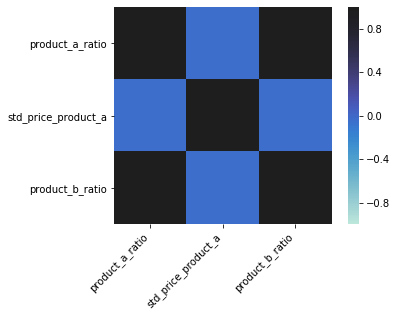

In [17]:

corr = df[features].corr()

fig, ax = plt.subplots()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=1, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right");

In [18]:
features = [
    "product_a_ratio",
    "std_price_product_a",
    "n_purchases_product_a",
    #    "product_b_ratio", # feature has pearson correlation 1.0 with product_a_ratio
]

In [19]:
df.loc['customer_0', "notes"] = "Positive in training set, but should be negative"
df.loc['customer_1', "notes"] = "good prediction as positive"
df

,product_a_ratio,std_price_product_a,n_purchases_product_a,product_b_ratio,y,notes
customer_id,,,,,,
customer_0,0.374540,0.177701,0,0.374540,0.0,"Positive in training set, but should be negative"
customer_1,0.950714,-1.335344,8,0.950714,1.0,good prediction as positive
customer_2,0.731994,0.380198,0,0.731994,0.0,NaN
customer_3,0.598658,0.610586,2,0.598658,1.0,NaN
customer_4,0.156019,0.559790,7,0.156019,1.0,NaN
...,...,...,...,...,...,...
customer_996,0.917314,-0.611769,8,0.917314,0.0,NaN
customer_997,0.136819,-0.037037,0,0.136819,0.0,NaN
customer_998,0.950237,-0.429302,5,0.950237,0.0,NaN
